# How to apply TICOI on one pixel of NetCDF cube ?

For this demonstration we are going to use the test data available on the git repository.
But you can modify it to use your one dataset!

In [1]:
from ticoi.core import ticoi_one_pixel
from ticoi import example

#### 1) Here are the demo specific variables that you should modify for your one dataset:

In [2]:
cube_name = example.get_path("ITS_LIVE_Lowell_Lower")
i, j = -138.17069, 60.29076  # coordinate in pixel
pick_dates = ["2015-01-01", "2024-01-01"]# date range to study

Datasets exist


#### 2) Then, let's define the main TICOI parameters

- Processing parameters

In [3]:
coef = 100  # Regularization coefficient to be used
delete_outliers = {"median_angle": 45} #Remove the observation if its direction is 45° away from the direction of the median vector
# delete_outliers = None

- Visualization parameters


In [4]:
show = True  # Plot some figures
option_visual = ["obs_magnitude", "invertvv","inverpvv", "quality_metrics"] #check README_visualization_pixel_output to see the different options .
result_quality = [

    "X_contribution",
]  # Criterium used to evaluate the quality of the results: ("Error_propagation": the initial error given in the dataset is propagated through the inversion; "X_contribution" correspond to the number of observed velocity used to estimate each estimated value

#### 4) To finish, we just have to run ticoi on our pixel!

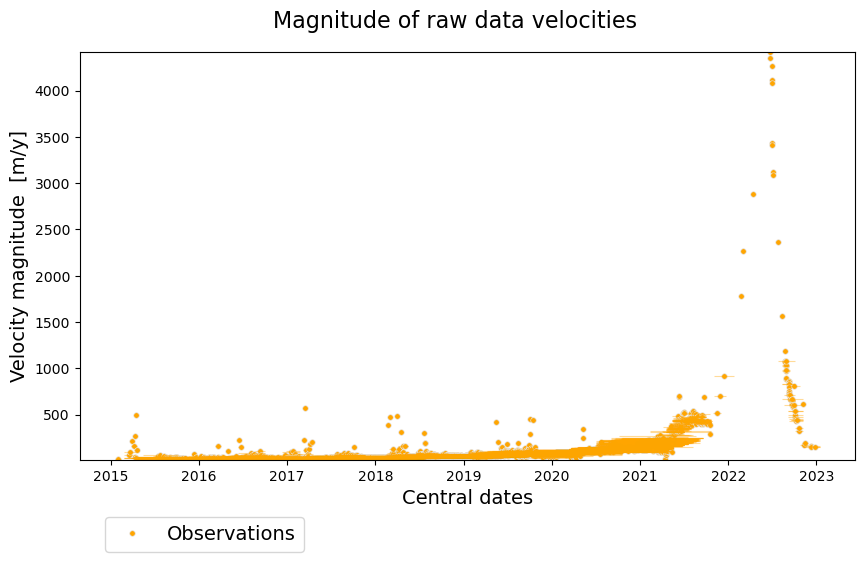

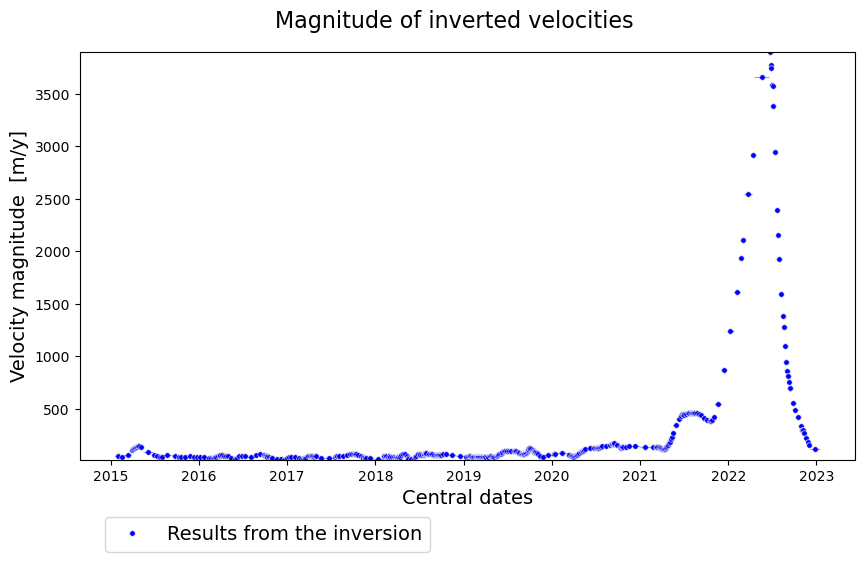

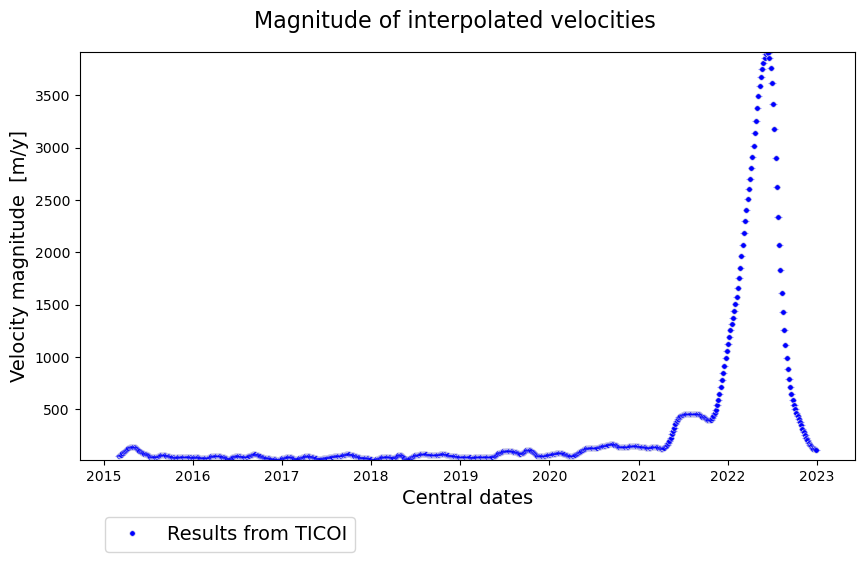

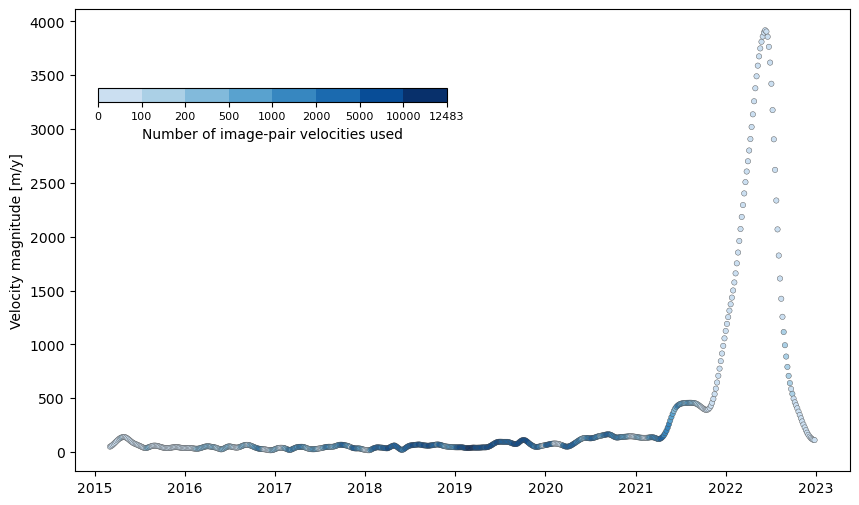

In [5]:
data, dataf, dataf_lp = ticoi_one_pixel(cube_name=cube_name, i=i, j=j, save=False, show=show,
                                        option_visual=option_visual,
                                        load_kwargs={"pick_date": pick_dates, "buffer": [i, j, 0.01]},
                                        load_pixel_kwargs={"visual": show},
                                        preData_kwargs={"delete_outliers": delete_outliers},
                                        inversion_kwargs={"coef": coef, "result_quality": result_quality,
                                                          "visual": show},
                                        interpolation_kwargs={"result_quality": result_quality})

#### To go further

If you want to see to the main function beyond ticoi_one_pixel, and understand a bit more the other possible parameters, you can check our pixel_ticoi_demo.py (examples > basic > python_script)